In [35]:
import pandas as pd
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [36]:
data = pd.read_csv('dbscan.csv')

data.head()

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"


Number of datapoints :  80


<AxesSubplot:xlabel='x', ylabel='y'>

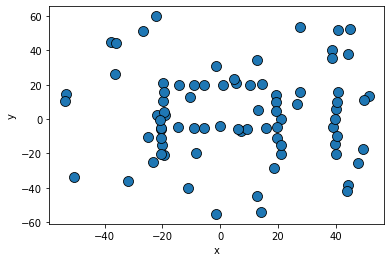

In [37]:
dataPoints = data[['x','y','num_neighbors','neighbors']].values

print("Number of datapoints : ", len(dataPoints))

sns.scatterplot(x='x', y='y', hue='cluster', data=data, palette='Set1', marker='o', s=100, edgecolor='k')

In [38]:
dataPoints[0][3].split(',')

['0', '27']

In [39]:
class DBScanCustom:
    def __init__(self,minPts,epsilon):
        self.minPts = minPts
        self.epsilon = epsilon
        self.labels = None
    
    def expand(self,currPt,currClusterId,dataset):
        self.labels[currPt] = currClusterId
        queue = deque([currPt])
        
        while queue:
            inQueue = queue.popleft()
            inQueueNeighbors = dataset[inQueue][3].split(',')
            
            if len(inQueueNeighbors)>=self.minPts:
                for n in inQueueNeighbors:
                    n = int(n)
                    if self.labels[n] == -1:
                        self.labels[n] = currClusterId
                    elif self.labels[n] == 0:
                        self.labels[n] = currClusterId
                        queue.append(n)
            
    def runDBScan(self,dataset):
        
        self.labels = [0]*len(dataset)
        startClusterId = 0
        
        for i in range(len(dataset)):
            
            if self.labels[i] != 0:
                continue
            neighbors = dataset[i][3].split(',')
            
            if len(neighbors)<self.minPts:
                self.labels[i] = -1
            else:
                startClusterId+=1
                self.expand(i,startClusterId,dataset)
        
        return self.labels
                
         
            

In [40]:
dbscan = DBScanCustom(epsilon = 7.5, minPts = 3)
labels = dbscan.runDBScan(dataPoints)
data['cluster'] = labels

In [41]:
data.head()

,cluster,pt,x,y,num_neighbors,neighbors
0,-1,0,51.418089,13.593610,2,"0,27"
1,1,1,39.132318,-4.419204,3,"1,40,75"
2,-1,2,47.807515,-25.822561,1,2
3,-1,3,27.699703,53.434193,1,3
4,1,4,39.860995,5.676871,3,"4,56,75"


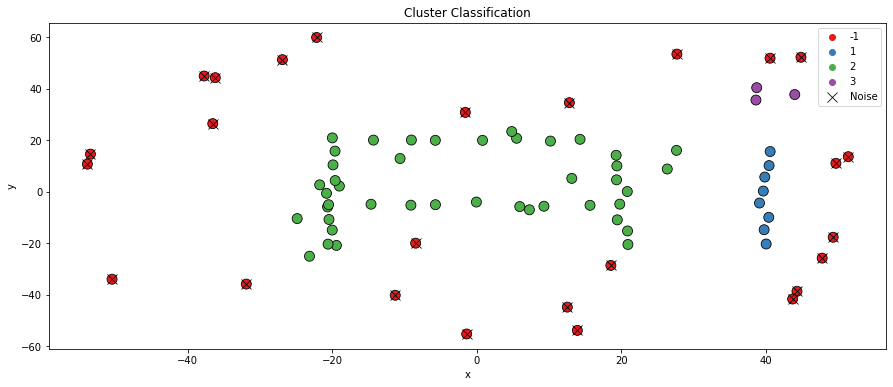

In [42]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=data, x='x', y='y', hue='cluster', palette='Set1', marker='o', s=100, edgecolor='k', legend="full")
sns.scatterplot(data=data[data['cluster'] == -1], x='x', y='y', color='black', label='Noise', marker='x', s=100)
plt.title("Cluster Classification")
plt.show()

In [43]:
data['cluster'].value_counts()

 2    43
-1    26
 1     8
 3     3
Name: cluster, dtype: int64